In [27]:
import torch
import matplotlib.pyplot as plt
import sys
import math
from torch import nn
sys.path.append("../../modules/time_embedding")

from sinusodial_embedding import get_time_embedding, get_time_embeddings


In [28]:
x = get_time_embedding(0)
y = get_time_embedding(1)
z = get_time_embedding(2)

print(x)
print(y)
print(z)

print(x.shape)
print(y.shape)

x2 = get_time_embedding(12, 10)
print(x2)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.,

In [29]:
timesteps = torch.arange(0, 100)         # Shape: (100,)
embedding_dim = 64
embeddings = get_time_embeddings(timesteps, embedding_dim)  # Shape: (100, 64)
print(embeddings)
print(embeddings.shape)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  1.0000,  1.0000,  1.0000],
        [ 0.8415,  0.6765,  0.5244,  ...,  1.0000,  1.0000,  1.0000],
        [ 0.9093,  0.9964,  0.8930,  ...,  1.0000,  1.0000,  1.0000],
        ...,
        [ 0.3796,  0.1880, -0.1361,  ...,  0.9998,  0.9999,  1.0000],
        [-0.5734, -0.5260, -0.6354,  ...,  0.9998,  0.9999,  1.0000],
        [-0.9992, -0.9627, -0.9459,  ...,  0.9998,  0.9999,  1.0000]])
torch.Size([100, 64])


# Visualize time embeddings in 2D

The value of a single time embedding is a vector with values between -1 and 1. We represent this on the column (Y) axis (the values of the embeddings) and in the X axis we represent the vector index (which is the time embedding dimension).

torch.Size([100, 320])


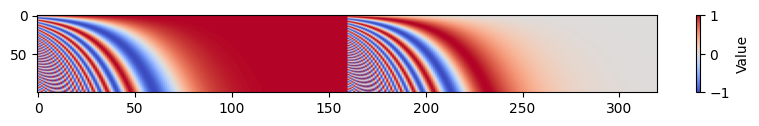

In [34]:
num_embeds = 100
dim = get_time_embedding(0).shape[1]
time_embeddings = torch.empty(num_embeds, dim)

print(time_embeddings.shape)
for i in range(num_embeds):
    embd = get_time_embedding(i)
    time_embeddings[i] = embd

plt.figure(figsize=(10, 1))
plt.imshow(time_embeddings, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Value')
# plt.axis('off')  # Optional: hide axes
plt.show()

### Different implementation of time embeddings

In [31]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        # TODO: Double check the ordering here
        return embeddings

torch.Size([100, 320])


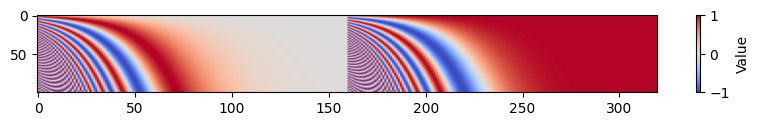

In [35]:
semb = SinusoidalPositionEmbeddings(dim)

time_embeddings = torch.empty(num_embeds, dim)
for i in range(num_embeds):
    embd = semb(torch.tensor([i], device='cpu'))
    time_embeddings[i] = embd

print(time_embeddings.shape)

plt.figure(figsize=(10, 1))
plt.imshow(time_embeddings, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Value')
# plt.axis('off')  # Optional: hide axes
plt.show()